In [1]:
import daft
from matplotlib import rc

In [2]:
rc("font", family="serif", size=9)
rc("text", usetex=True)
rc('text.latex', preamble=r'\usepackage{newtxtext,newtxmath}')

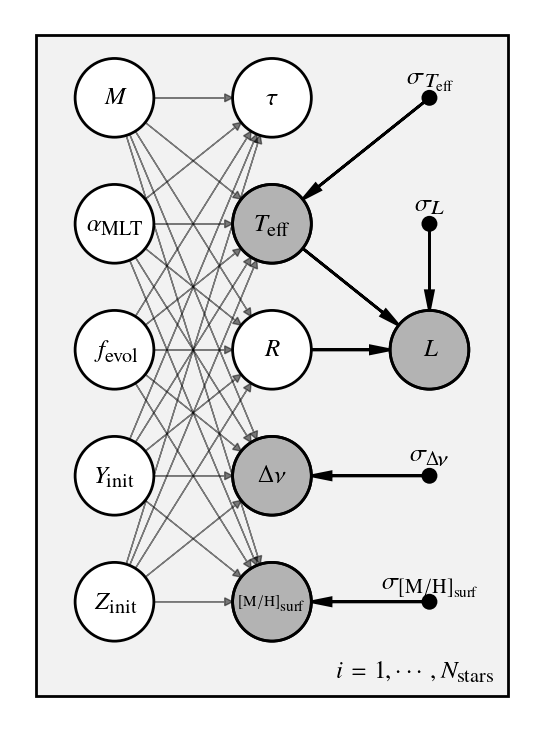

In [3]:
node_params = {'facecolor': 'white'}

# Instantiate the PGM.
pgm = daft.PGM()

# Parameters
pgm.add_node("y", r"$Y_{\mathrm{init}}$", 1.5, 1.2, plot_params=node_params)
pgm.add_node("mh", r"$Z_\mathrm{init}$", 1.5, 0.4, plot_params=node_params)
pgm.add_node("mass", r"$M$", 1.5, 3.6, plot_params=node_params)
pgm.add_node("f_age", r"$f_{\mathrm{evol}}$", 1.5, 2., plot_params=node_params)
pgm.add_node("mlt", r"$\alpha_\mathrm{MLT}$", 1.5, 2.8, plot_params=node_params)

# # Latent variables
# pgm.add_node("age", r"$\mathrm{age}$", 3.5, 3.6, plot_params=node_params)
# pgm.add_node("rad", r"$R$", 3.5, 2., plot_params=node_params)
# pgm.add_node("teff", r"$T_{\mathrm{eff}}$", 3.5, 2.8, plot_params=node_params)
# pgm.add_node("smh", r"$[\mathrm{M}/\mathrm{H}]_\mathrm{surf}$", 3.5, 0.4, fontsize=4.5, plot_params=node_params)
# pgm.add_node("dnu", r"$\Delta\nu$", 3.5, 1.2, plot_params=node_params)

# # Data
# pgm.add_node("olum", r"$L_{\mathrm{obs}}$", 4.5, 3.6, observed=True)
# pgm.add_node("lum", r"$L$", 4.5, 2.8, plot_params=node_params)
# pgm.add_node("oteff", r"$T_{\mathrm{eff}}^{\mathrm{obs}}$", 4.5, 2., observed=True)
# pgm.add_node("osmh", r"$[\mathrm{M}/\mathrm{H}]_\mathrm{surf}^{\mathrm{obs}}$", 4.5, 0.4, observed=True, fontsize=4.5)
# pgm.add_node("odnu", r"$\Delta\nu_{\mathrm{obs}}$", 4.5, 1.2, observed=True)

# Latent variables
pgm.add_node("age", r"$\tau$", 2.5, 3.6, plot_params=node_params)
pgm.add_node("rad", r"$R$", 2.5, 2., plot_params=node_params)
pgm.add_node("teff", r"$T_{\mathrm{eff}}$", 2.5, 2.8, observed=True)
pgm.add_node("smh", r"$[\mathrm{M}/\mathrm{H}]_\mathrm{surf}$", 2.5, 0.4, fontsize=5, observed=True)
pgm.add_node("dnu", r"$\Delta\nu$", 2.5, 1.2, observed=True)
pgm.add_node("lum", r"$L$", 3.5, 2., observed=True)

# Uncertainties
pgm.add_node("olum_e", r"$\sigma_{L}$", 3.5, 2.8, fixed=True)
pgm.add_node("oteff_e", r"$\sigma_{\,T_{\mathrm{eff}}}$", 3.5, 3.6, fixed=True)
pgm.add_node("osmh_e", r"$\sigma_{[\mathrm{M}/\mathrm{H}]_\mathrm{surf}}$", 3.5, 0.4, fixed=True)
pgm.add_node("odnu_e", r"$\sigma_{\Delta\nu}$", 3.5, 1.2, fixed=True)

inputs = ['mass', 'mlt', 'f_age', 'y', 'mh']
outputs = ['age', 'teff', 'rad', 'dnu', 'smh']

for i in inputs:
    for o in outputs:
        pgm.add_edge(i, o, plot_params={'alpha': 0.5, 'linewidth': 0.5, 'head_length': 0.1})

pgm.add_edge("rad", "lum")
pgm.add_edge("teff", "lum")
# pgm.add_edge("lum", "olum")

# pgm.add_edge("teff", "oteff")
# pgm.add_edge("smh", "osmh")
# pgm.add_edge("dnu", "odnu")

pgm.add_edge("olum_e", "lum")
pgm.add_edge("oteff_e", "teff")
pgm.add_edge("osmh_e", "smh")
pgm.add_edge("odnu_e", "dnu")

pgm.add_plate([1., -0.2, 3, 4.2], label=r"$i = 1, \cdots, N_\mathrm{stars}$", shift=0, position='bottom right',
              rect_params={'facecolor': '0.95'},
             )

pgm.render(dpi=200)

### Save

In [4]:
pgm.savefig("pgms/no_pool_pgm.pdf")
pgm.savefig("pgms/no_pool_pgm.png", dpi=300)

In [5]:
pgm.savefig("../paper/figures/no_pool_pgm.png", dpi=300)